In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('/Users/kirtan/Downloads/Student_Performance_Prdiction/data/Student_Performance_Prdiction.csv')

In [70]:
df.head()

,Hours Studied,CGPA,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,9.9,Yes,9,1,91.0
1,4,8.2,No,4,2,65.0
2,8,5.1,Yes,7,2,45.0
3,5,5.2,Yes,5,2,36.0
4,7,7.5,No,8,5,66.0


In [71]:
df.columns

Index(['Hours Studied', 'CGPA', 'Extracurricular Activities', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   CGPA                              10000 non-null  float64
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [73]:
df.isnull().sum()

Hours Studied                       0
CGPA                                0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [74]:
df.shape

(10000, 6)

# Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
LE = LabelEncoder()

In [77]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [78]:
df['Extracurricular Activities'] = LE.fit_transform(df['Extracurricular Activities'])

# Data Visualization

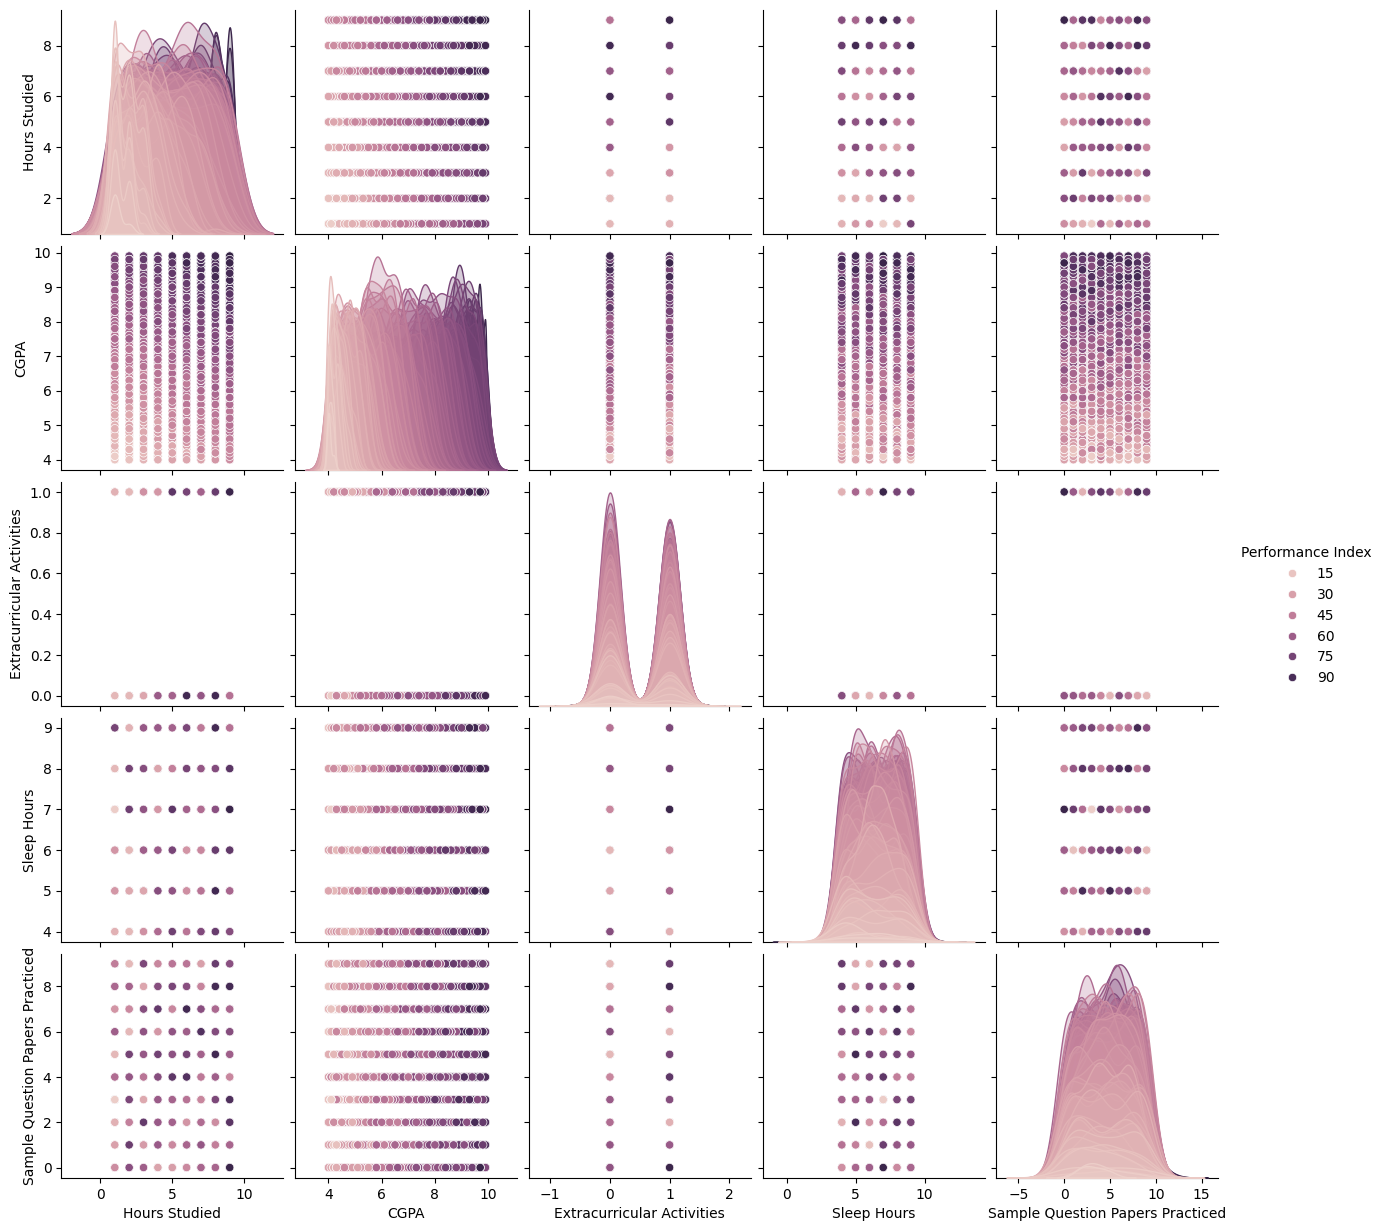

In [79]:
sns.pairplot(data=df, hue='Performance Index')
plt.show()

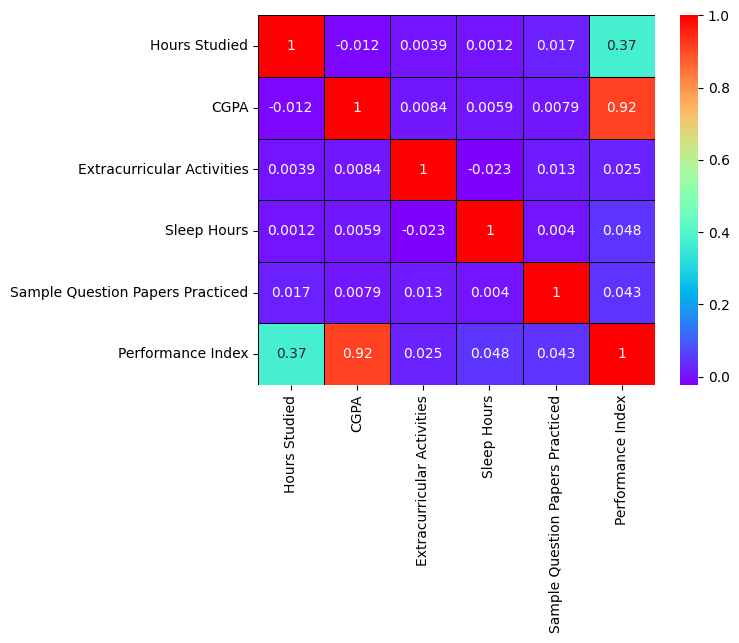

In [80]:
sns.heatmap(df.corr(), cmap='rainbow', linecolor='black', linewidths=0.5, annot=True)
plt.show()

# Train & Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = df.drop(columns='Performance Index', axis=1)
X

,Hours Studied,CGPA,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,9.9,1,9,1
1,4,8.2,0,4,2
2,8,5.1,1,7,2
3,5,5.2,1,5,2
4,7,7.5,0,8,5
...,...,...,...,...,...
9995,1,4.9,1,4,2
9996,7,6.4,1,8,5
9997,6,8.3,1,8,5
9998,9,9.7,1,7,0


In [83]:
y = df['Performance Index']
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
SD = StandardScaler()

In [87]:
X_train_SD = SD.fit_transform(X_train)
X_test_SD = SD.transform(X_test)

# Model Training

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [89]:
models = {
    'LinearRegression' : LinearRegression(),
    'RandomForestRegression' : RandomForestRegressor(),
    'AdaBoostRegression' : AdaBoostRegressor(),
    'GradientBoostingRegression' : GradientBoostingRegressor(),
    'DecisionTreeRegression' : DecisionTreeRegressor()
}

In [90]:
for model_name, model in models.items():
    model.fit(X_train_SD, y_train)

LinearRegression
r2_score:  0.9887203279837654
mse:  4.082628398521854


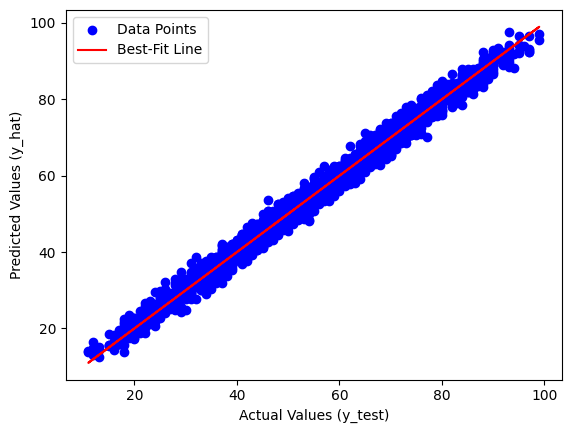

----------------------------------------------------------------
RandomForestRegression
r2_score:  0.9857401849768828
mse:  5.176604802248436


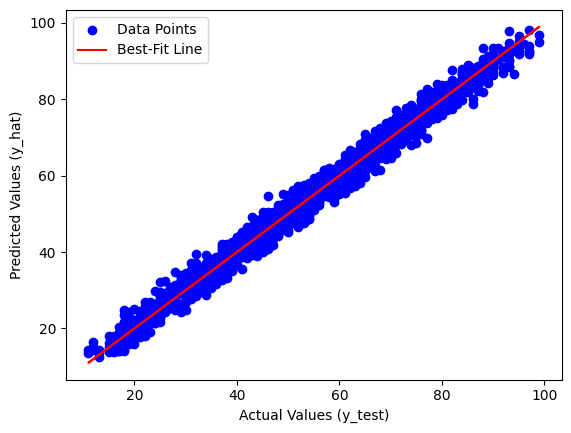

----------------------------------------------------------------
AdaBoostRegression
r2_score:  0.9733769163286796
mse:  8.835736644425284


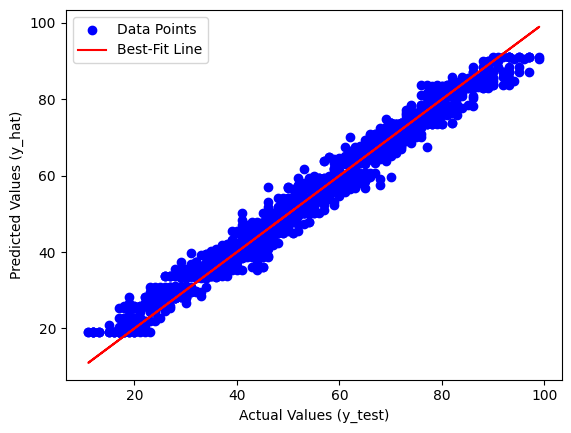

----------------------------------------------------------------
GradientBoostingRegression
r2_score:  0.9878454223776212
mse:  4.364635848301435


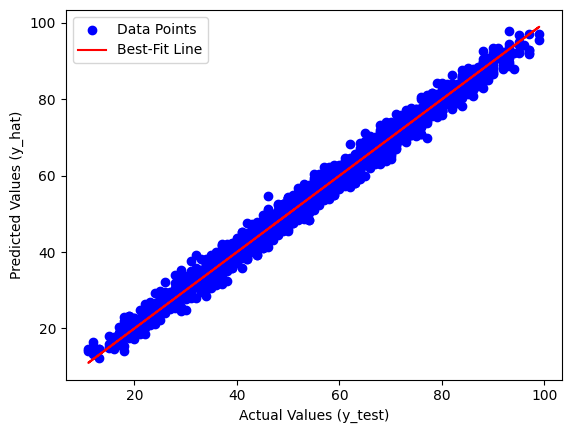

----------------------------------------------------------------
DecisionTreeRegression
r2_score:  0.9761970085649094
mse:  8.750194444444444


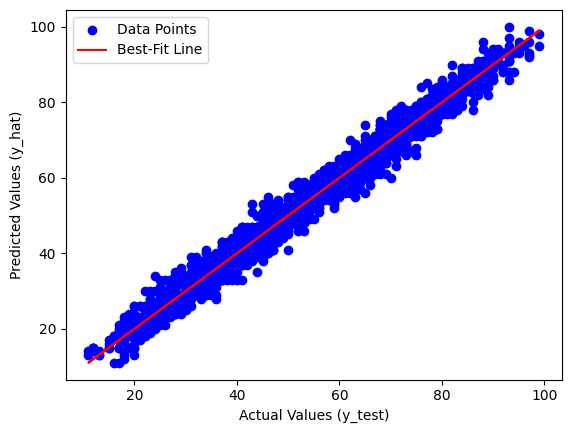

----------------------------------------------------------------


In [91]:
for model_name, model in models.items():
    y_hat = model.predict(X_test_SD)
    
    print(model_name)
    print('r2_score: ', r2_score(y_hat, y_test))
    print('mse: ', mean_squared_error(y_hat, y_test))
    # Plotting the best-fit line
    plt.scatter(y_test, y_hat, color='blue', label='Data Points')
    plt.plot(y_test, y_test, color='red', label='Best-Fit Line')

    # Add labels and a legend to the plot
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_hat)')
    plt.legend()

    # Show the plot
    plt.show()

    print('----------------------------------------------------------------')